In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [66]:
# Import the log file
#df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_201853/190622_201853_Detection_paramSearch.csv")
#df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_202211/190622_202211_Detection_paramSearch.csv")
#df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190624_200747/190624_200747_Detection_paramSearch.csv")
df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_234007/190622_234007_Detection_paramSearch.csv")

# Add the f1_score
#df["f1_score"] = 2/(1/df["percentHeliTotalFiltered"]+1/df["percentFrameWithHeli"])

# Display
df.tail()

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold_low,threshold_gain,sigma,diffMethod,dilationIterations,skipFrame,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
295,7,25,9,3,5,65,1.25,0.1,0,7,0,147.760140,6.411357,5.872576,0.777008,0.132311,0.767442,0.225709
296,7,25,9,3,5,65,1.25,0.3,0,7,0,144.564055,4.427978,3.973684,0.790859,0.199024,0.781122,0.317222
297,7,25,9,3,5,65,1.25,0.5,0,7,0,137.640210,4.005540,3.547091,0.822715,0.231941,0.812585,0.360875
298,7,25,9,3,5,65,1.25,0.7,0,7,0,132.198751,3.649584,3.216066,0.814404,0.253230,0.804378,0.385195
299,7,25,9,3,5,65,1.25,0.9,0,7,0,125.799390,3.664820,3.191136,0.807479,0.253038,0.797538,0.384185


[0, 1, 0, 1]

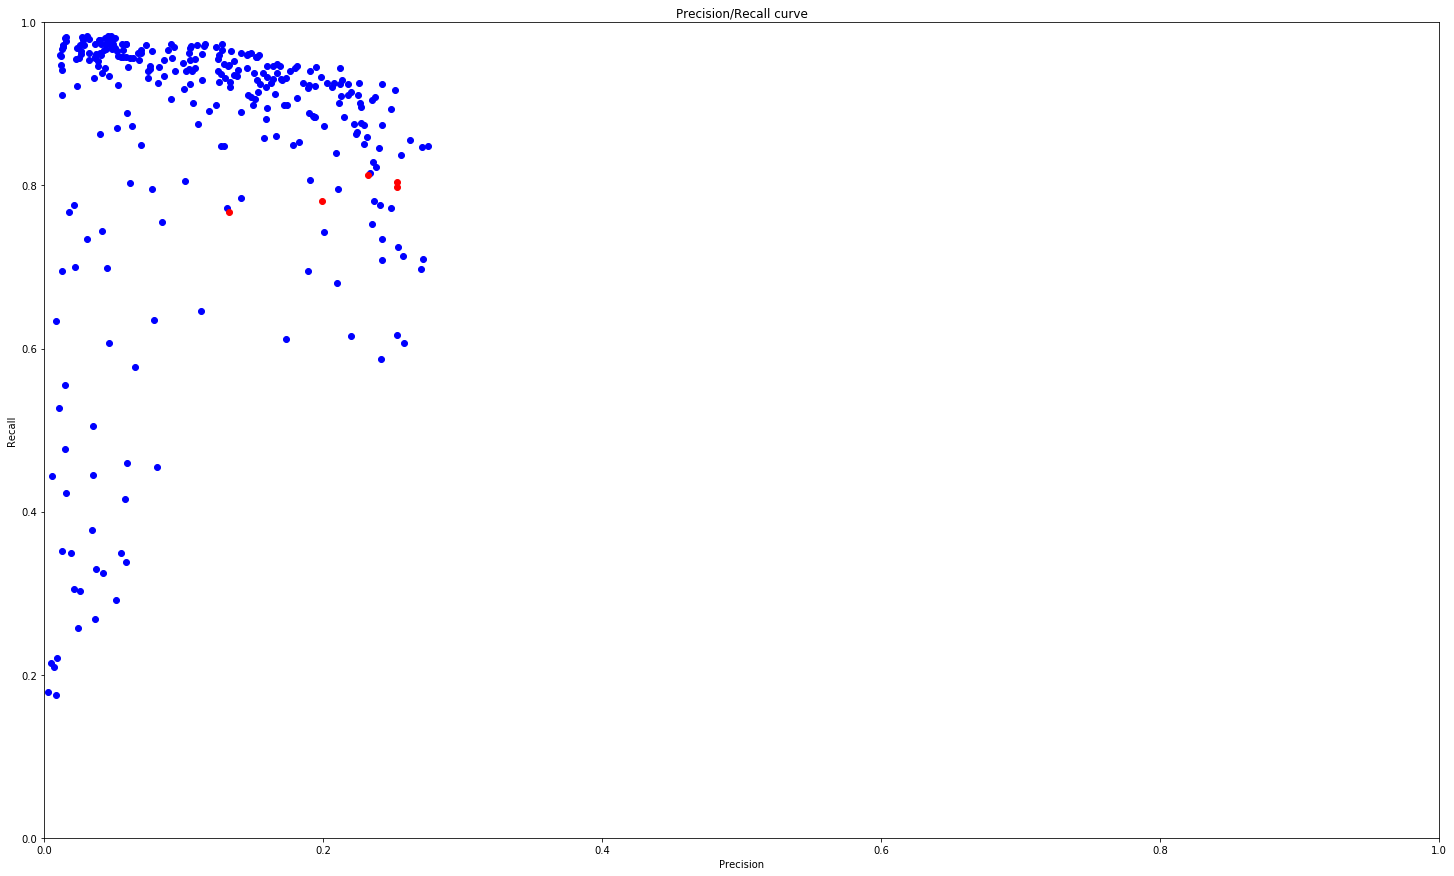

In [67]:
nSim = len(df)-5 # Show where the last 10 values have been found
plt.figure(figsize=(25, 15))
plt.scatter(df["percentHeliTotalFiltered"][:nSim], df["percentFrameWithHeli"][:nSim], c='blue')
plt.scatter(df["percentHeliTotalFiltered"][nSim:], df["percentFrameWithHeli"][nSim:], c='red')
plt.title("Precision/Recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.axis([0, 1, 0, 1])

In [68]:
def plotParam(param, paramRange):
    plt.figure(figsize=(25, 15))
    cmap = matplotlib.cm.get_cmap("jet")
    for index, value in enumerate(paramRange):
        #plt.figure(figsize=(25, 15))
        indexes = (df[param] == value)
        prec = df["percentHeliTotalFiltered"][indexes]
        recall = df["percentFrameWithHeli"][indexes]
        #print(min(paramRange), max(paramRange))
        if len(paramRange)>1:
            cmapValue = index/(len(paramRange)-1)
        else:
            cmapValue=0
        #print(cmapValue)
        plt.scatter(prec, recall, c=cmap(cmapValue))
        
        xcText, ycText = np.mean(prec), np.mean(recall)
        plt.text(xcText, ycText, str(value), color=cmap(cmapValue), fontdict={"weight": "bold", "size": 30})
        plt.title(param+" impact", fontdict={"weight": "bold", "size": 30})
        plt.xlabel("Precision", fontdict={"weight": "bold", "size": 20})
        plt.ylabel("Recall", fontdict={"weight": "bold", "size": 20})
        plt.axis([0, 1, 0, 1])

param = ["residualConnections"]
paramRange = [range(1, 11)]
for i in range(len(param)):
    plotParam(param[i], paramRange[i])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

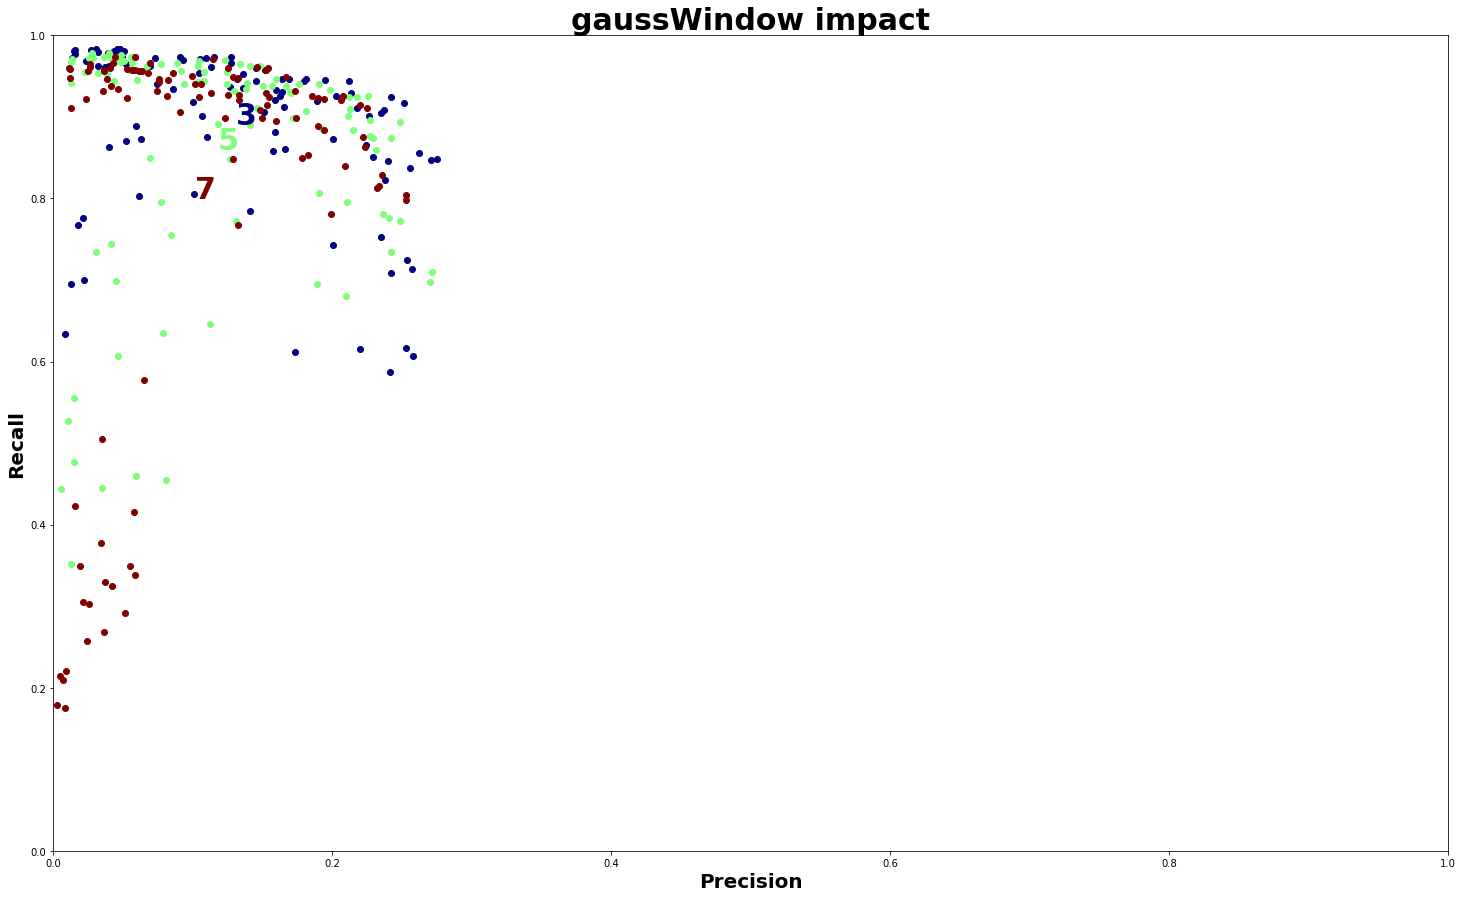

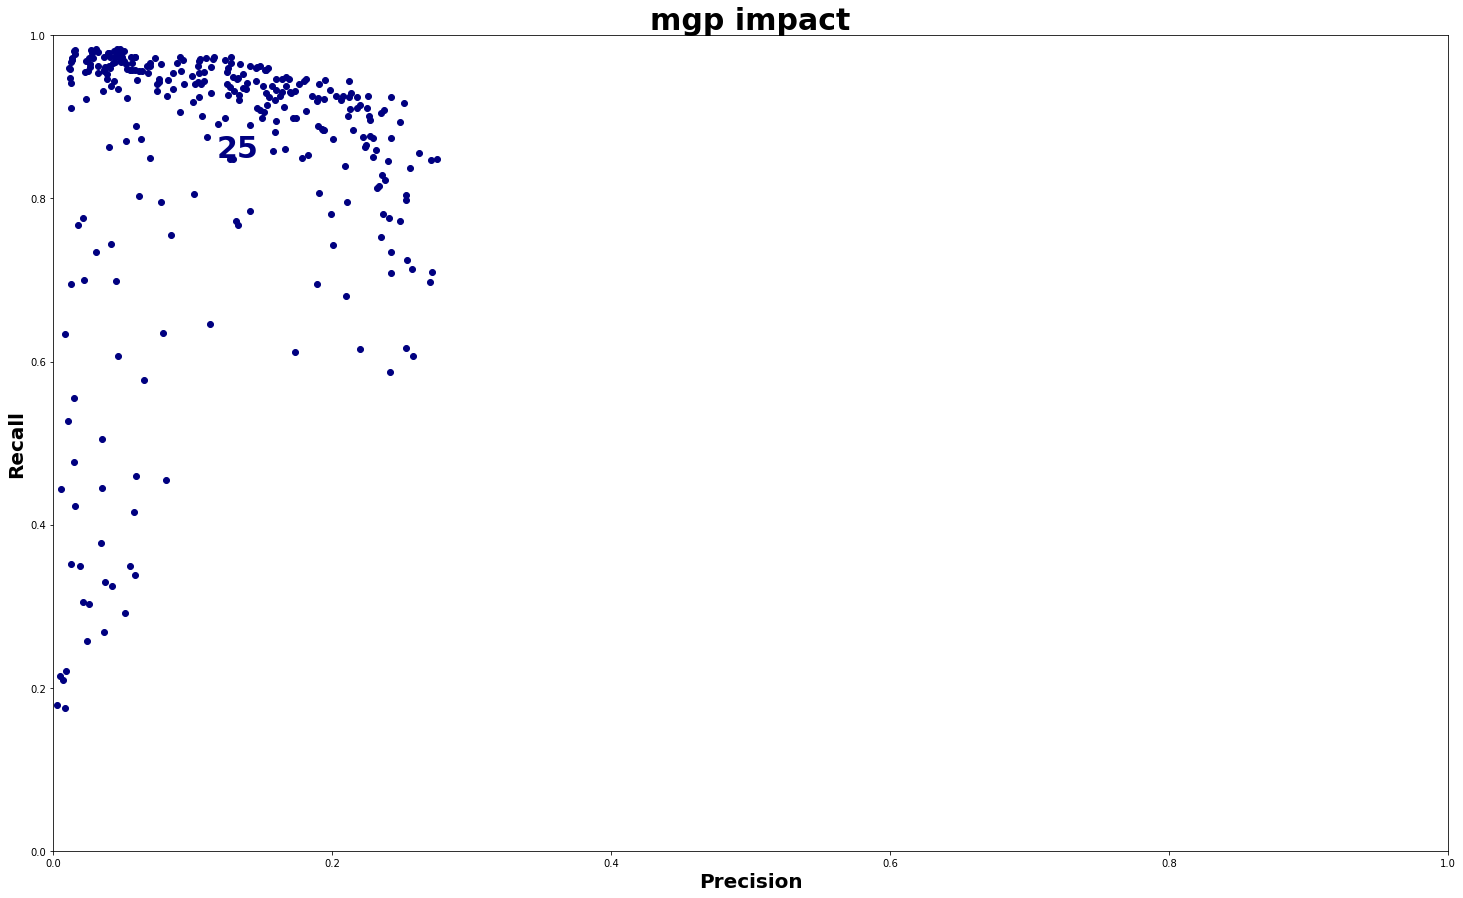

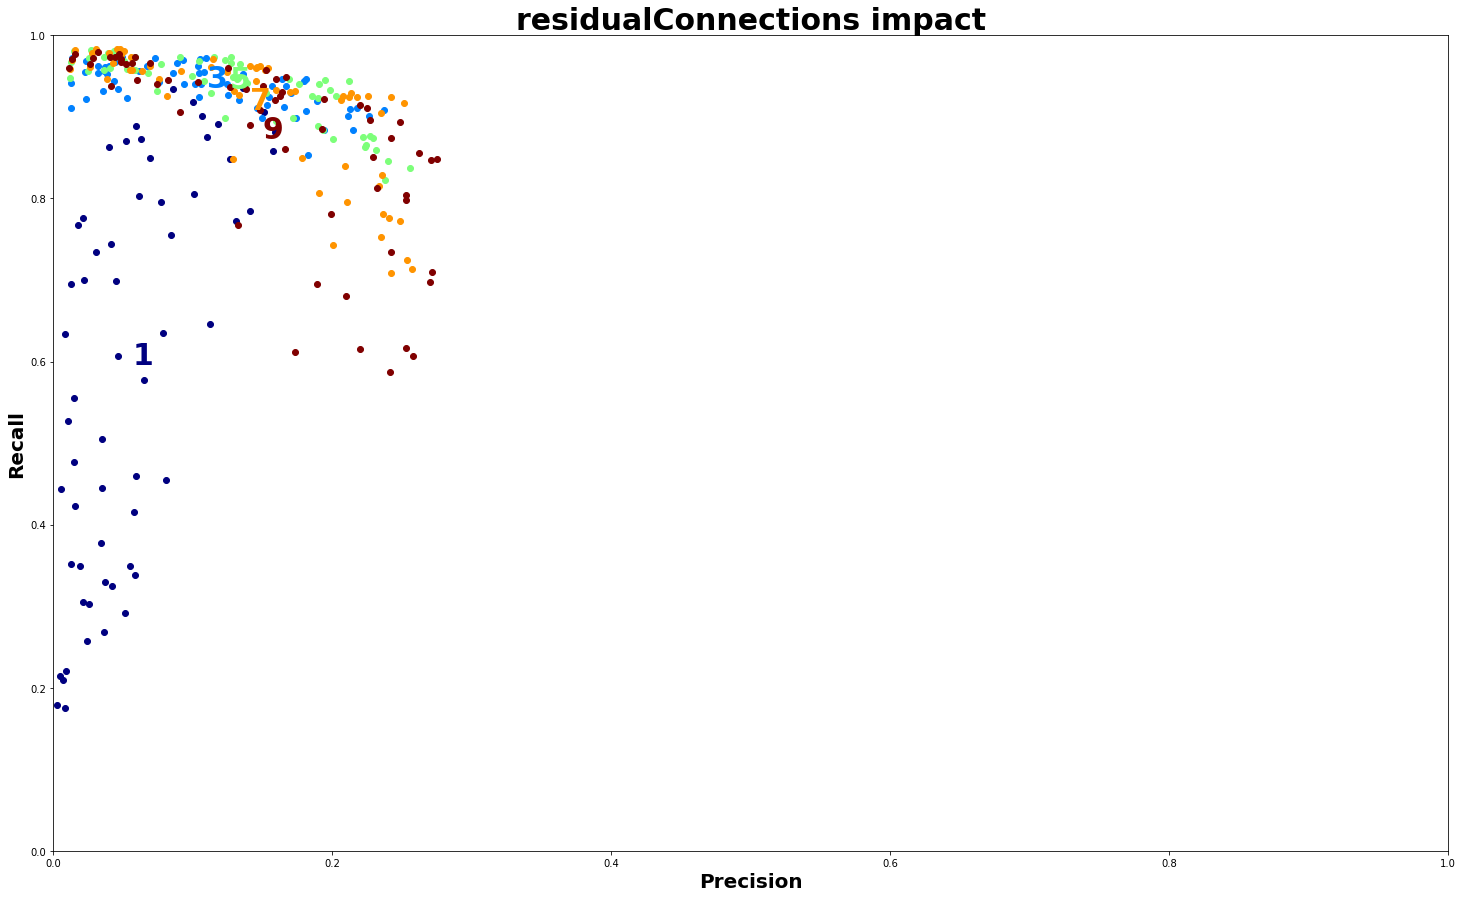

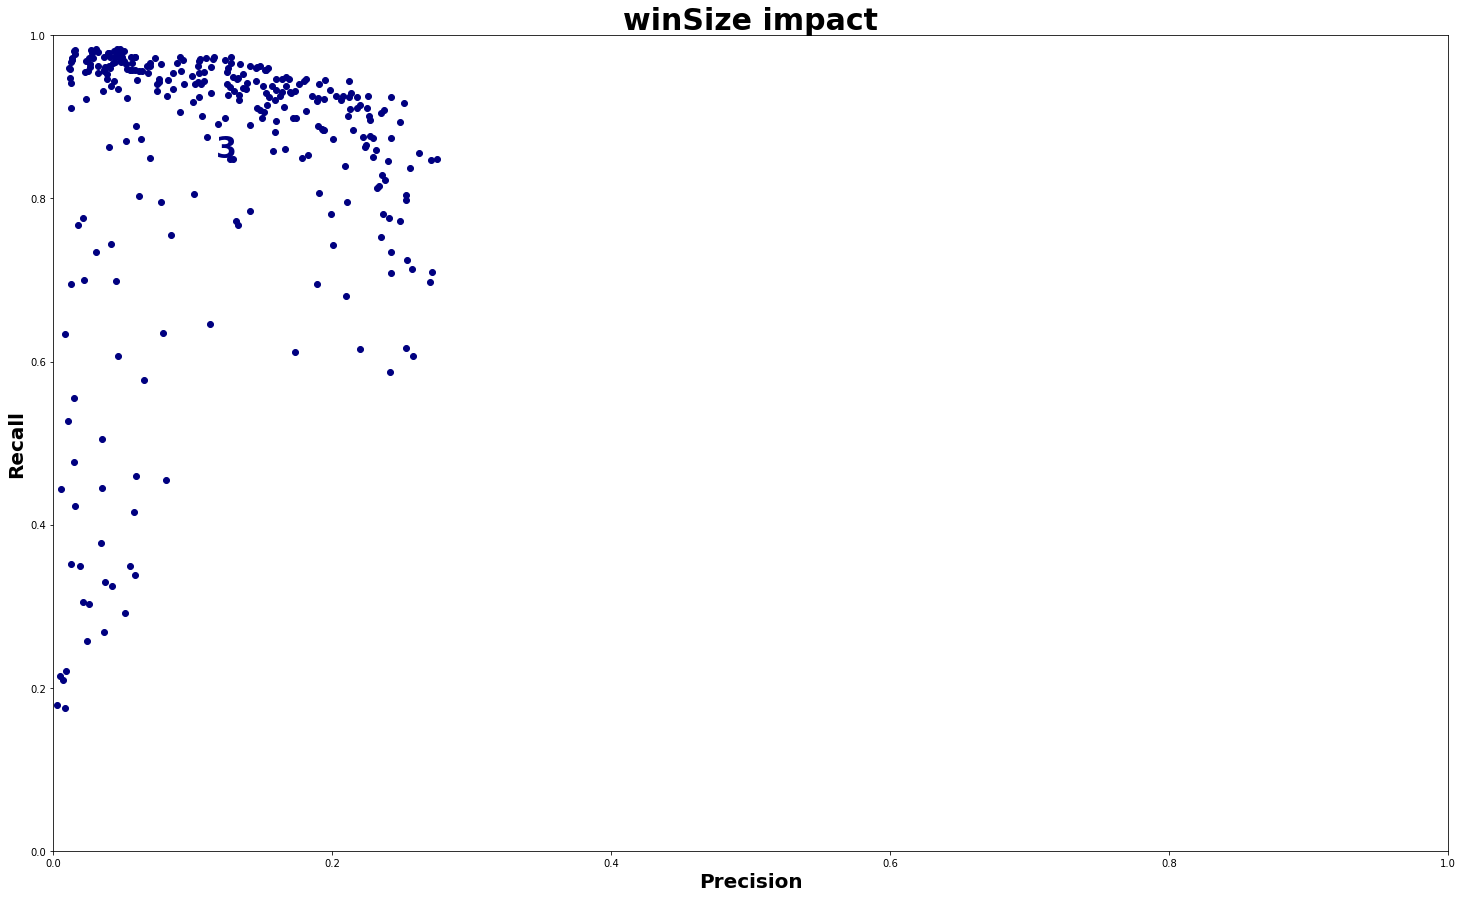

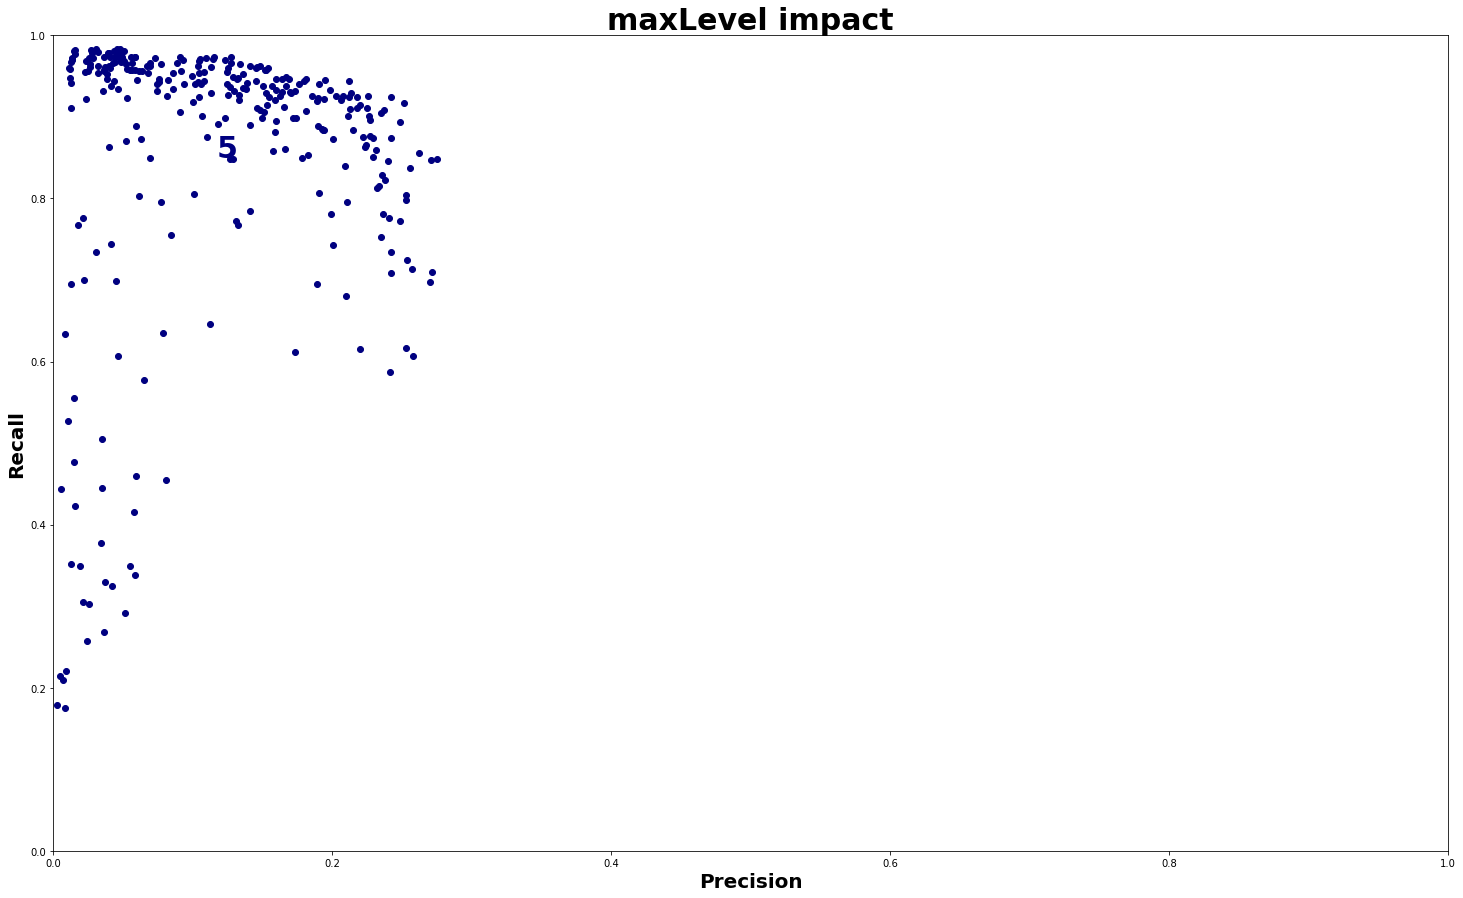

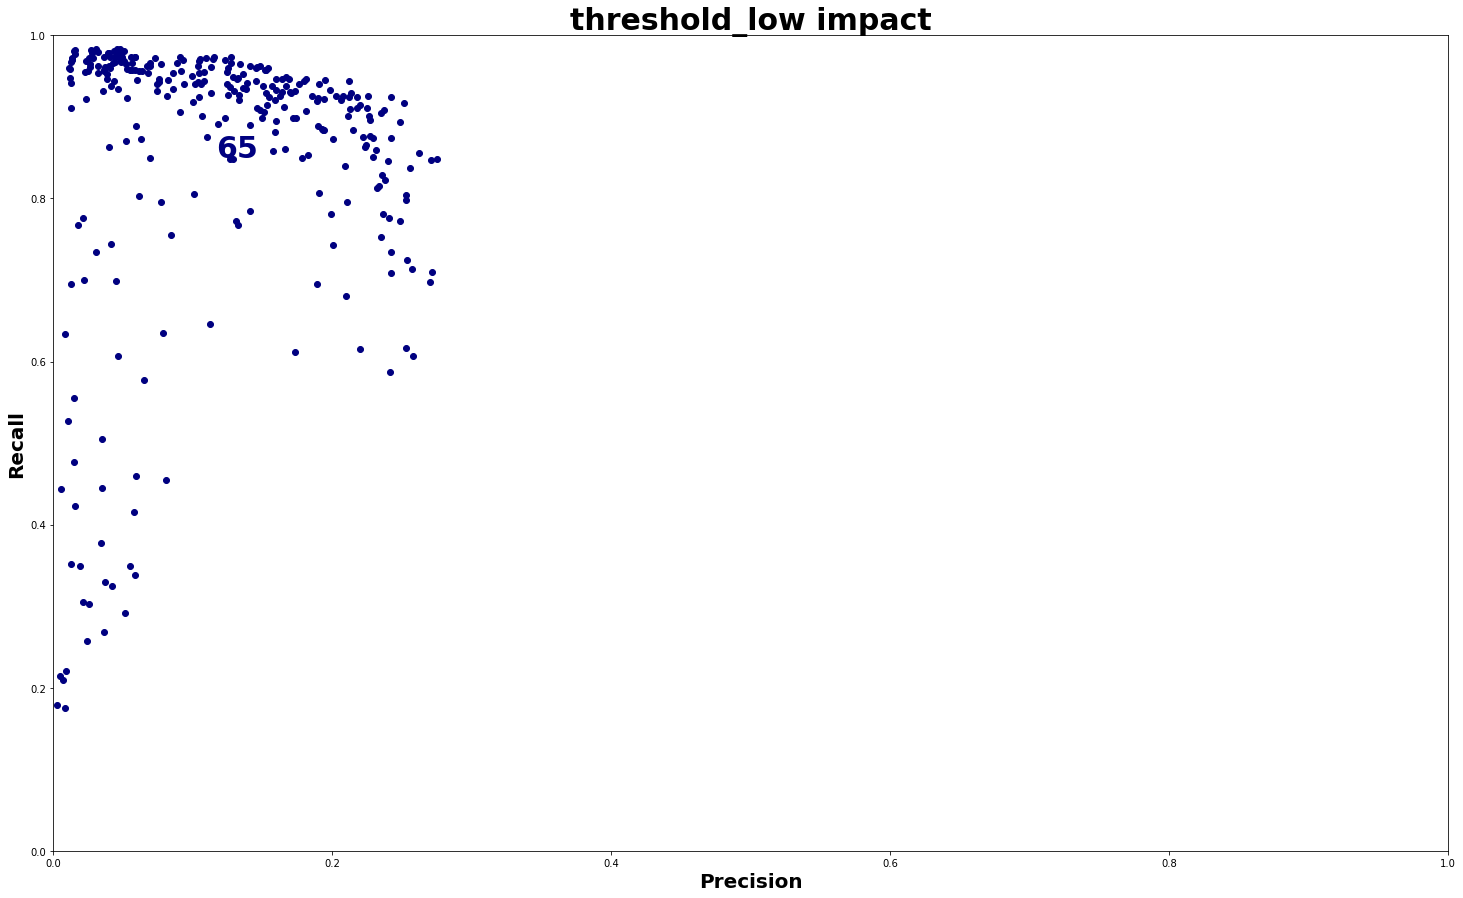

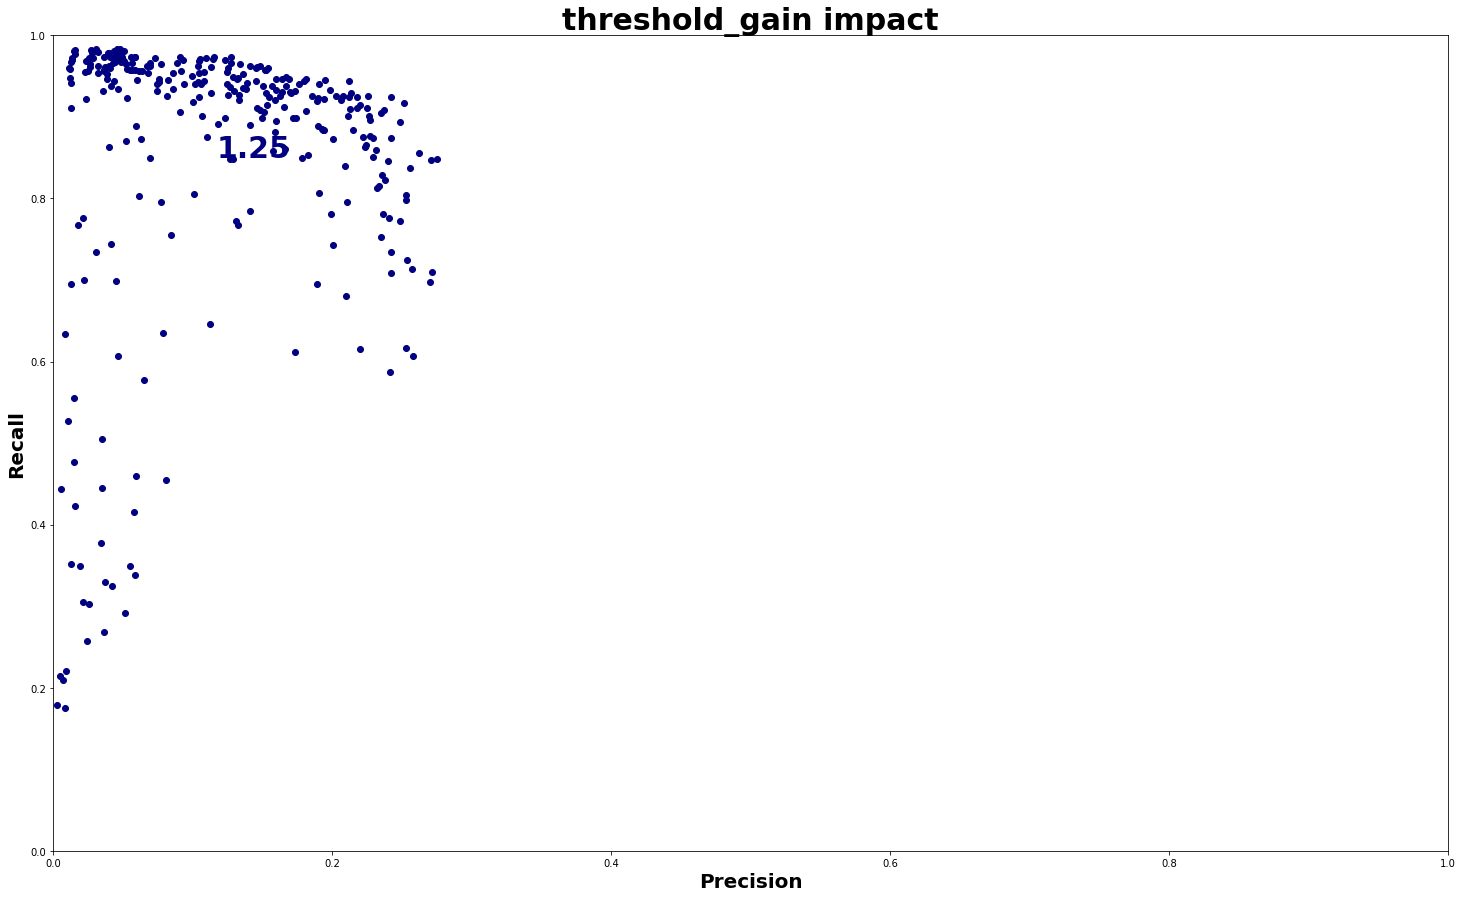

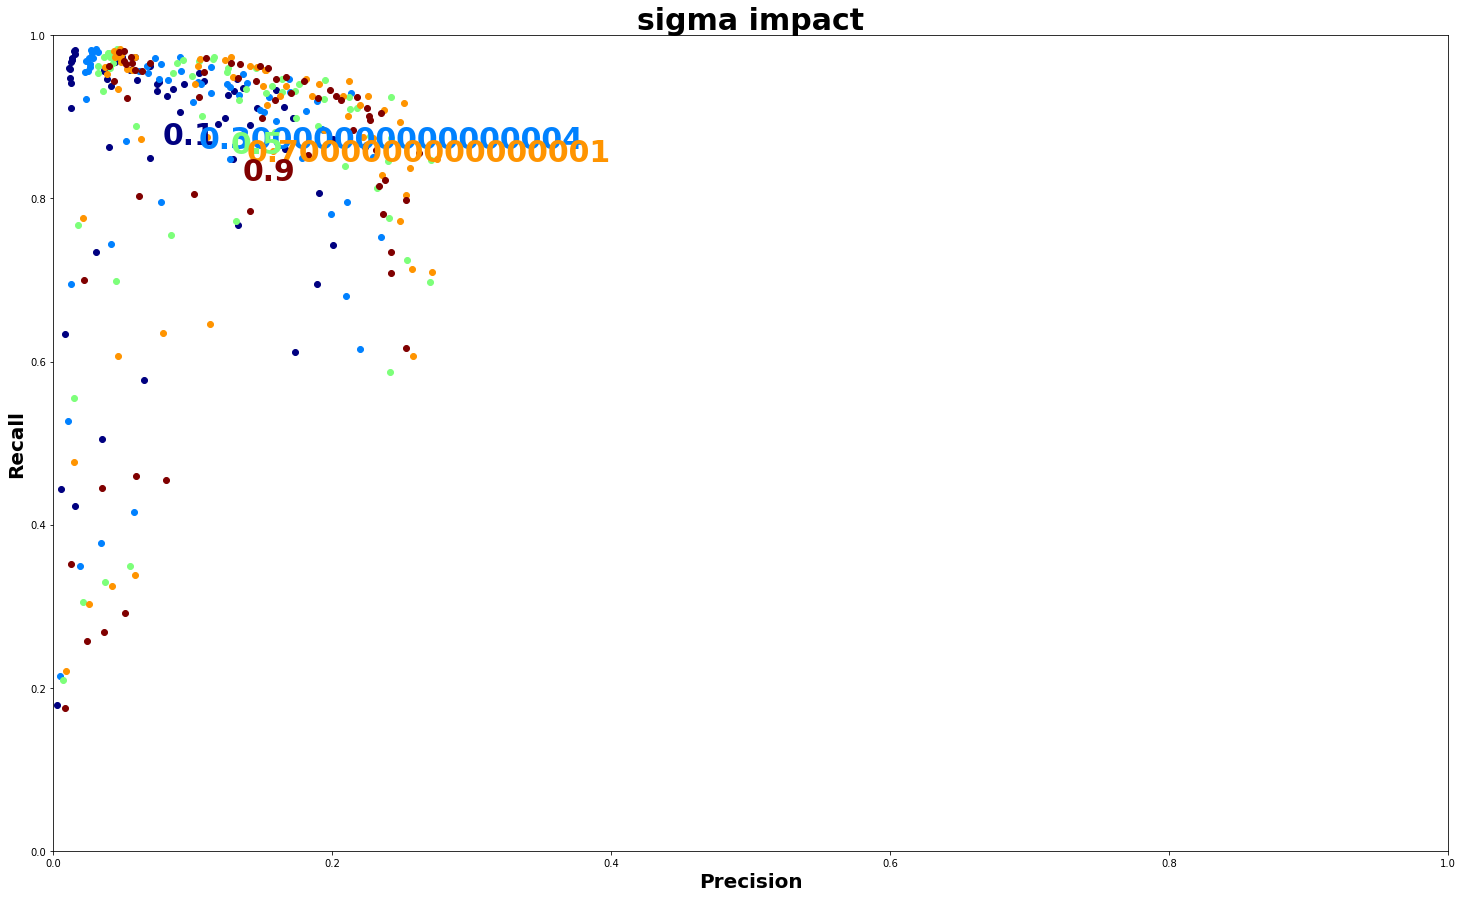

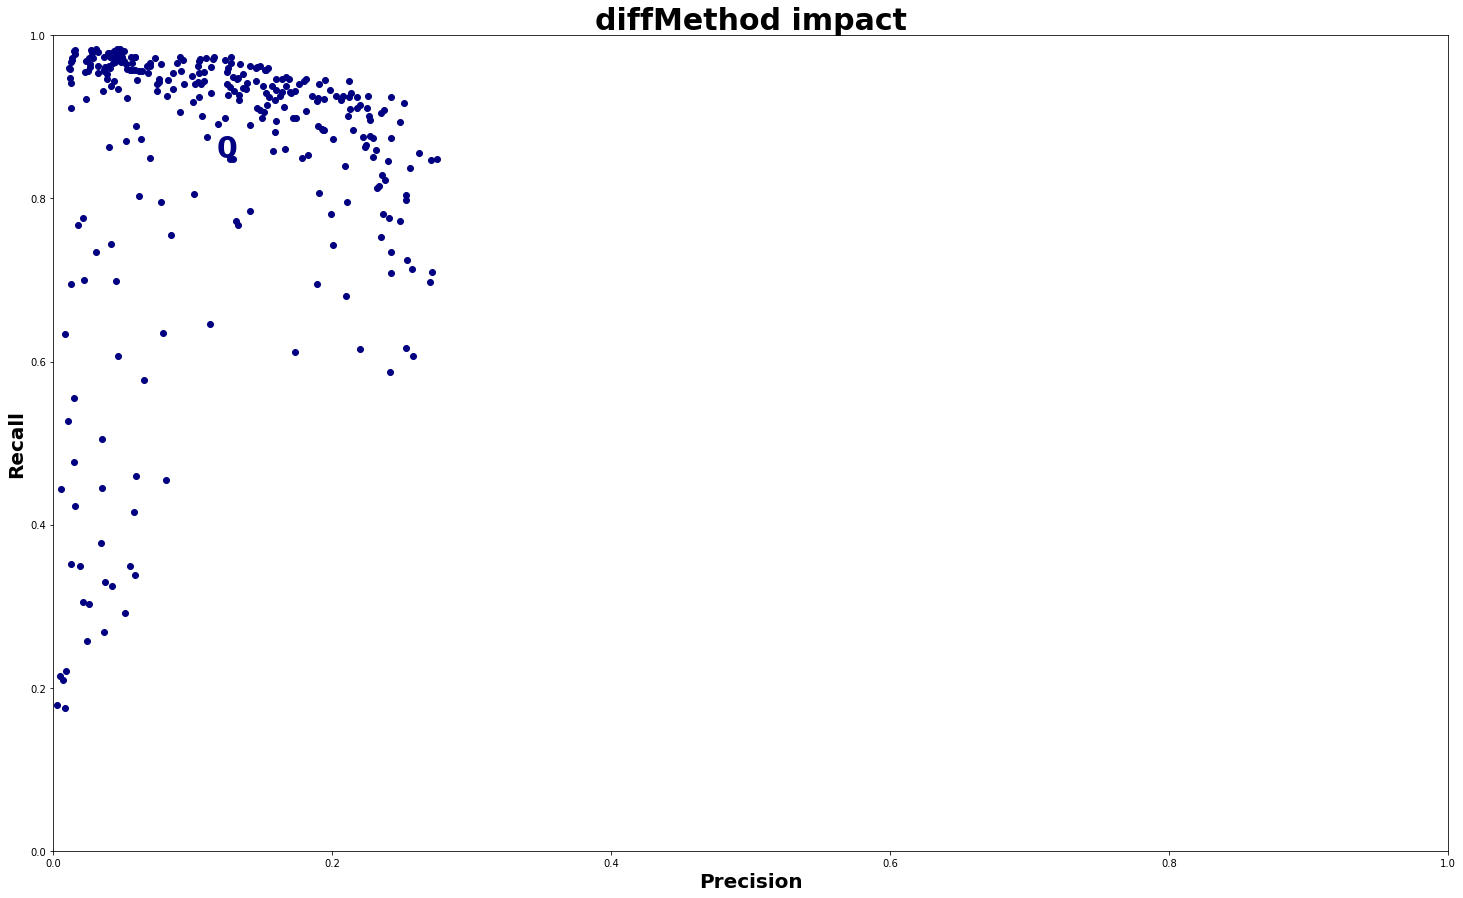

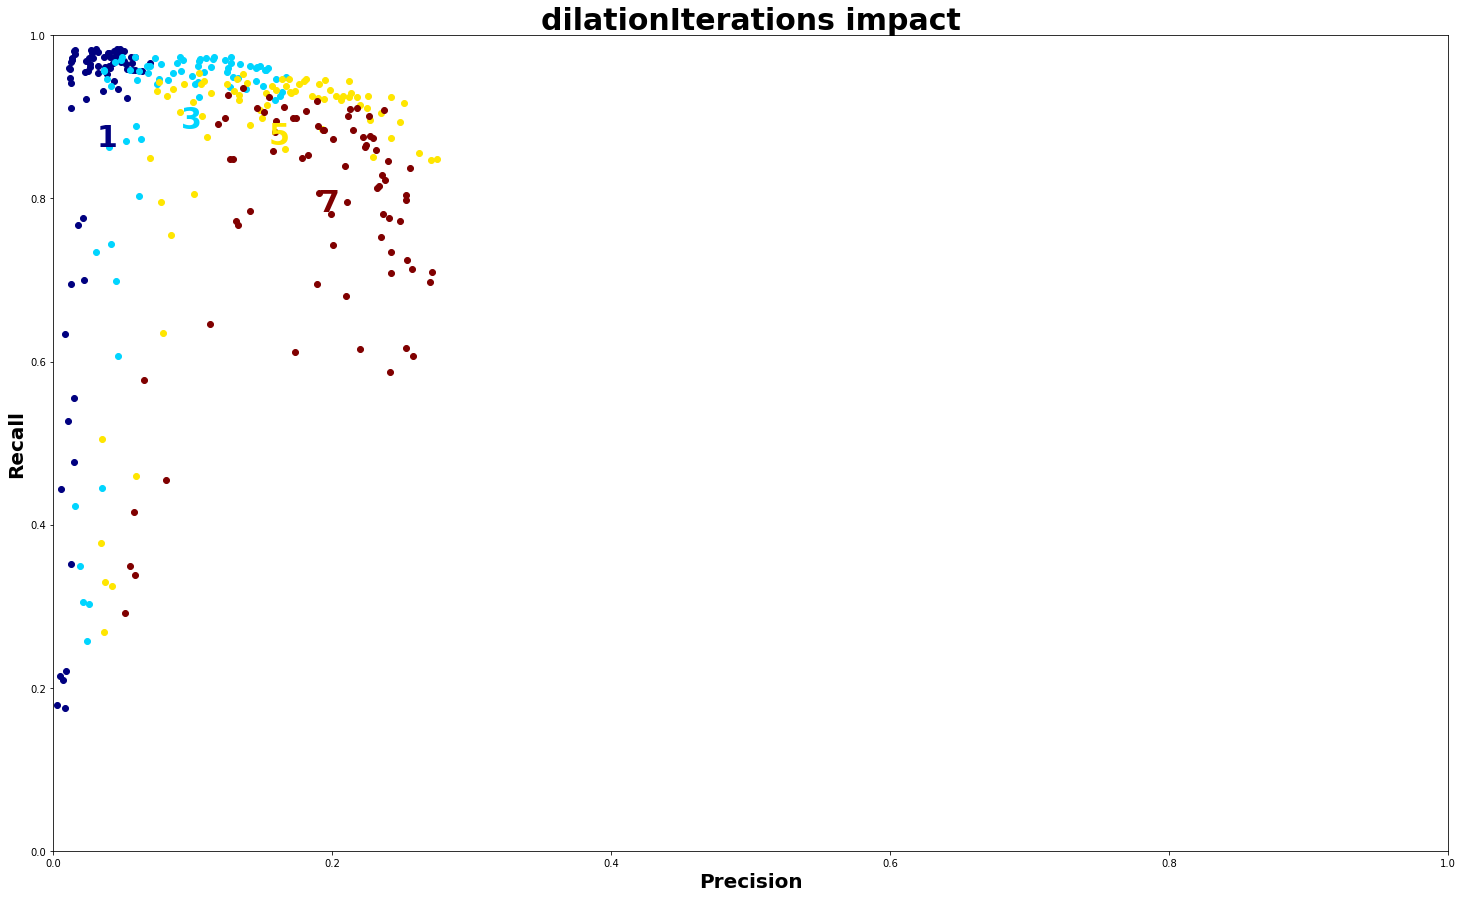

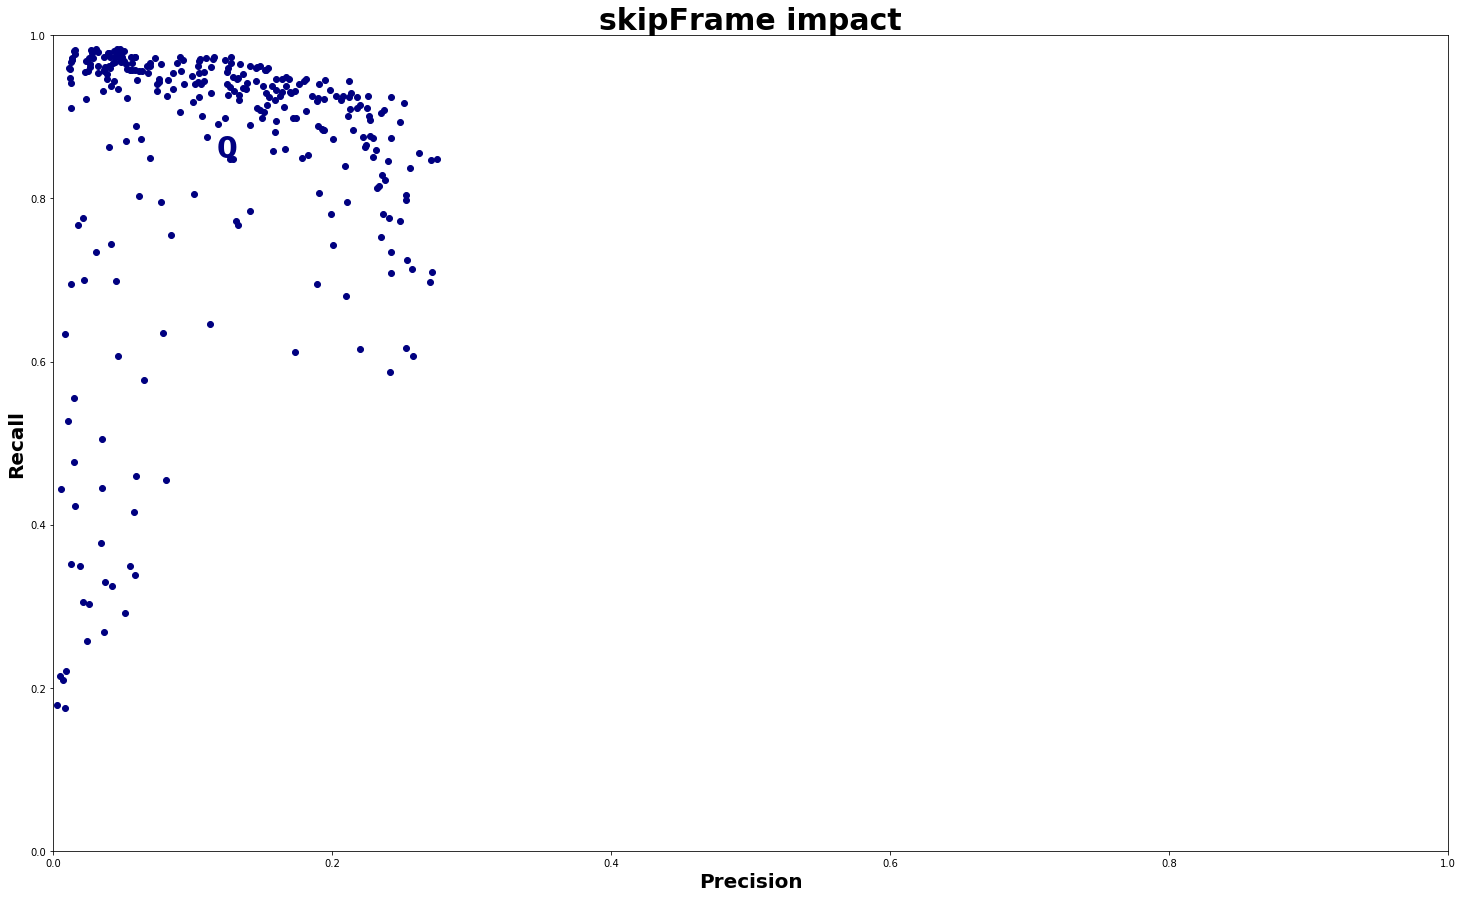

In [69]:
params = {
	'gaussWindow': range(3, 8, 2),
	'mgp': range(25, 26, 25),
	'residualConnections': range(1, 10, 2),
	'winSize': range(3, 4, 2),
	'maxLevel': range(5, 6, 3),
	'threshold_low': range(65, 66, 10),
	'threshold_gain': np.linspace(1.25, 1.26, 1),
	'sigma': np.linspace(0.1, 0.9, 5),
	'diffMethod': range(0, 1, 1),
	'dilationIterations': range(1, 8, 2),
	'skipFrame': range(0, 1, 1)
}
for items in params.items():
    plotParam(items[0], items[1])

In [46]:
# Max f1_score
df[df["f1_score"] == max(df["f1_score"])]

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold_low,threshold_gain,sigma,diffMethod,dilationIterations,skipFrame,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
241,3,25,7,3,5,65,1.25,0.3,0,7,0,185.44736,1.224719,1.206461,0.950843,0.788126,0.941586,0.858048


In [47]:
# Max precision
df[df["percentHeliTotalFiltered"] == max(df["percentHeliTotalFiltered"])]

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold_low,threshold_gain,sigma,diffMethod,dilationIterations,skipFrame,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
289,7,25,5,3,5,65,1.25,0.9,0,7,0,150.590171,0.970588,0.969188,0.830532,0.856936,0.824757,0.840539


In [48]:
# Max recall
df[df["percentFrameWithHeli"] == max(df["percentFrameWithHeli"])]

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold_low,threshold_gain,sigma,diffMethod,dilationIterations,skipFrame,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
240,3,25,7,3,5,65,1.25,0.1,0,7,0,187.058906,1.311798,1.285112,0.973315,0.757377,0.963839,0.848225


[0, 300, 0, 1]

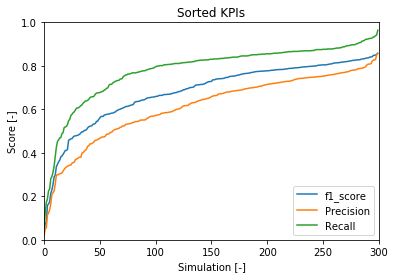

In [49]:
plt.figure()
plt.plot(sorted(df["f1_score"]))
plt.plot(sorted(df["percentHeliTotalFiltered"]))
plt.plot(sorted(df["percentFrameWithHeli"]))
plt.legend(['f1_score', 'Precision', 'Recall'])
plt.title("Sorted KPIs")
plt.xlabel("Simulation [-]")
plt.ylabel("Score [-]")
plt.axis([0, len(df), 0, 1])